#### Convolutional Neural Network - rose and daisy classification


To classify roses or daisies from images using CNN as implemented in TensorFlow. The basic machine learning workflow:

- Examine and understand data
- Build an input pipeline
- Build the model
- Train the model
- Test the model
- Improve the model and repeat the process (Data augmentation and dropout —Key techniques to fight overfitting in model)


#### Data Source:
I loaded rose and daisy image folders from kaggle 
https://www.kaggle.com/alxmamaev/flowers-recognition/downloads/flowers-recognition.zip/2


The workflow reference:
https://github.com/mileserickson/tensorflow-docs/blob/master/site/en/r2/tutorials/images/_image_classification.ipynb

#### prepare data directory

In [93]:
import os
import shutil

In [96]:
roses = os.listdir('rose-daisy/train/rose')

for i in range(200):
    shutil.move(os.path.join('rose-daisy/train/rose', roses[i]), 'rose-daisy/validation/rose')

In [97]:
daisies = os.listdir('rose-daisy/train/daisy')
    
for i in range(200):
    shutil.move(os.path.join('rose-daisy/train/daisy', daisies[i]), 'rose-daisy/validation/daisy')

In [98]:
!tree

.
├── AUTHORS
├── CODEOWNERS
├── CONTRIBUTING.md
├── Convolutional-Neural-Network.ipynb
├── LICENSE
├── README.md
├── rose-daisy
│   ├── train
│   │   ├── daisy
│   │   │   ├── 100080576_f52e8ee070_n.jpg
│   │   │   ├── 10437754174_22ec990b77_m.jpg
│   │   │   ├── 10466558316_a7198b87e2.jpg
│   │   │   ├── 10555749515_13a12a026e.jpg
│   │   │   ├── 107592979_aaa9cdfe78_m.jpg
│   │   │   ├── 10994032453_ac7f8d9e2e.jpg
│   │   │   ├── 11439894966_dca877f0cd.jpg
│   │   │   ├── 1150395827_6f94a5c6e4_n.jpg
│   │   │   ├── 11834945233_a53b7a92ac_m.jpg
│   │   │   ├── 1265350143_6e2b276ec9.jpg
│   │   │   ├── 1299501272_59d9da5510_n.jpg
│   │   │   ├── 1314069875_da8dc023c6_m.jpg
│   │   │   ├── 1342002397_9503c97b49.jpg
│   │   │   ├── 13583238844_573df2de8e_m.jpg
│   │   │   ├── 13901930939_a7733c03f0_n.jpg
│   │   │   ├── 14167543177_cd36b54ac6_n.jpg
│   │   │   ├── 14272874304_47c0a46f5a.jpg
│   │   │   ├── 14330343061_99478302d4_m.jpg
│   │   │   ├── 14421389519_d5fd353eb4.jpg
│   │   │

│       ���   ├── 8348621545_8f02b82662_n.jpg
│       │   ├── 8382667241_0f046cecdb_n.jpg
│       │   ├── 8383753520_8391dd80ee_m.jpg
│       │   ├── 8405273313_bef13f6c27_n.jpg
│       │   ├── 8446495985_f72d851482.jpg
│       │   ├── 8489463746_a9839bf7e4.jpg
│       │   ├── 8616684075_71923bb771_n.jpg
│       │   ├── 8645839873_0151fb92bf_n.jpg
│       │   ├── 8671824531_64b816949e_m.jpg
│       │   ├── 8681746439_d6beeefbf9.jpg
│       │   ├── 8694909523_3ca25d449d_n.jpg
│       │   ├── 8696022686_1f8d62c5cb_m.jpg
│       │   ├── 8706810197_17b6c1f1e7.jpg
│       │   ├── 8708143485_38d084ac8c_n.jpg
│       │   ├── 8709110478_60d12efcd4_n.jpg
│       │   ├── 8709535323_a6bea3e43f.jpg
│       │   ├── 8718637649_87a0d85190_n.jpg
│       │   ├── 8719756744_34a5a83976_n.jpg
│       │   ├── 8742143296_fed9fa007c.jpg
│       │   ├── 8759177308_951790e00d_m.jpg
│       │   ├── 8882282142_9be2524d38_m.jpg
│       │   ├── 8887005939_b19e8305ee.jpg
│       │   ├── 8932490012_cc08e690ba_n.jpg


In [51]:
import pandas as pd
from tensorflow.keras.models import Sequential

In [ ]:
!brew install wget  
!pip install --upgrade --ignore-installed wrapt  
!pip install tensorflow==2.0.0-beta0  
!pip install tensorflow_datasets  

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
train_dir = 'rose-daisy/train'
validation_dir = 'rose-daisy/validation'

In [56]:
train_roses_dir = 'rose-daisy/train/rose'  
train_daisies_dir = 'rose-daisy/train/daisy'  
validation_roses_dir = 'rose-daisy/validation/rose'  
validation_daisies_dir = 'rose-daisy/validation/daisy'  

rose and daisy images in the training and validation directory:

In [57]:
num_roses_tr = len(os.listdir(train_roses_dir))
num_daisies_tr = len(os.listdir(train_daisies_dir))

num_roses_val = len(os.listdir(validation_roses_dir))
num_daisies_val = len(os.listdir(validation_daisies_dir))

total_train = num_roses_tr + num_daisies_tr
total_val = num_roses_val + num_daisies_val

In [58]:
print('total training rose images:', num_roses_tr)
print('total training daisy images:', num_daisies_tr)

print('total validation rose images:', num_roses_val)
print('total validation daisy images:', num_daisies_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training rose images: 584
total training daisy images: 569
total validation rose images: 200
total validation daisy images: 200
--
Total training images: 1153
Total validation images: 400


Set the model parameters

In [59]:
batch_size = 100
epochs = 15
IMG_SHAPE = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

#### Data preparation
Format the images into pre-processed floating point tensors before feeding to the network:

* Read images from the disk.
* Decode contents of these images and convert it into proper grid format as per their RGB content.
* Convert them into floating point tensors.
* Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
* Fortunately, all these tasks can be done with the ImageDataGenerator class provided by tf.keras. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [60]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [61]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     # Its usually best practice to shuffle the training data
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                     class_mode='binary')

Found 1153 images belonging to 2 classes.


In [62]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 400 images belonging to 2 classes.


#### Visualize training images
Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with matplotlib.

In [63]:
sample_training_images, _ = next(train_data_gen)

The next function returns a batch from the dataset. The return value of next function is in form of (x_train, y_train) where x_train is training features and y_train, its labels. Discard the labels to only visualize the training images.

In [64]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

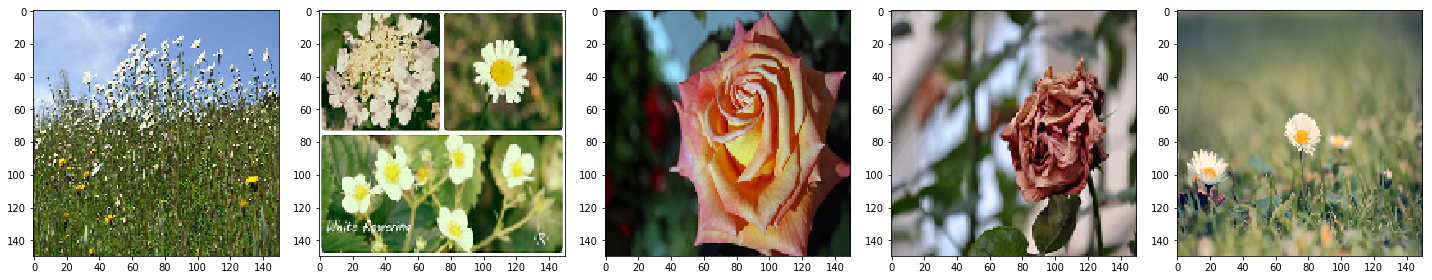

In [65]:
plotImages(sample_training_images[:5])

#### Create the model
The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 512 units on top of it thatr is activated by a relu activation function. The model outputs class probabilities based on binary classification by the sigmoid activation function.

In [66]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3,)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Compile the model
For this tutorial, choose the ADAM optimizer and binary cross entropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument.

In [67]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

View all the layers of the network using the model's summary method:

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

Train the model
Use the fit_generator method of the ImageDataGenerator class to train the network.

In [69]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/15
12/12 [==============================] - 21s 2s/step - loss: 1.0632 - accuracy: 0.5620 - val_loss: 0.6963 - val_accuracy: 0.5125
Epoch 2/15
12/12 [==============================] - 18s 2s/step - loss: 0.5989 - accuracy: 0.6739 - val_loss: 0.5185 - val_accuracy: 0.7850
Epoch 3/15
12/12 [==============================] - 17s 1s/step - loss: 0.4663 - accuracy: 0.7684 - val_loss: 0.4437 - val_accuracy: 0.8125
Epoch 4/15
12/12 [==============================] - 18s 1s/step - loss: 0.4231 - accuracy: 0.7971 - val_loss: 0.4337 - val_accuracy: 0.8150
Epoch 5/15
12/12 [==============================] - 18s 2s/step - loss: 0.4012 - accuracy: 0.8205 - val_loss: 0.4182 - val_accuracy: 0.8225
Epoch 6/15
12/12 [==============================] - 19s 2s/step - loss: 0.3468 - accuracy: 0.8491 - val_loss: 0.4476 - val_accuracy: 0.8100
Epoch 7/15
12/12 [==============================] - 21s 2s/step - loss: 0.3351 - accuracy: 0.8552 - val_loss: 0.4339 - val_accuracy: 0.7850
Epoch 8/15
12/12 [==

Visualize training results
Now visualize the results after training the network.

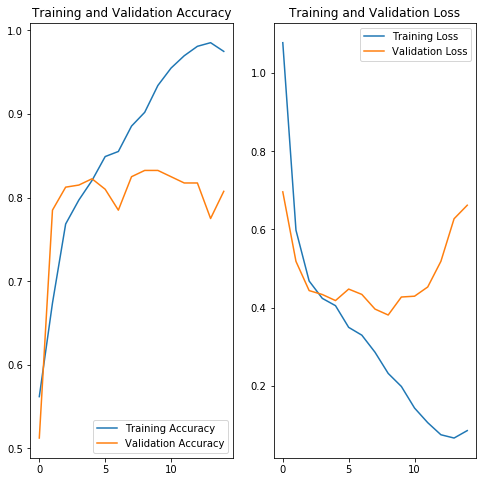

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 80% accuracy on the validation set.

Let's look at what went wrong and try to increase overall performance of the model.

In [ ]:
# What we've learned: training a CNN from scratch

#### Overfitting
In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 80% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use data augmentation and add dropout to our model.

To begin, clear the previous Keras session and start a new one:

In [71]:
# Clear resources
tf.keras.backend.clear_session()
epochs = 80

#### Data augmentation
Overfitting generally occurs when there are a small number of training examples. One way to fix this problem is to augment the dataset so that it has a sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images. The goal is the model will never see the exact same picture twice during training. This helps expose the model to more aspects of the data and generalize better.

Implement this in tf.keras using the ImageDataGenerator class. Pass different transformations to the dataset and it will take care of applying it during the training process.

Augment and visualize data
Begin by applying random horizontal flip augmentation to the dataset and see how individual images look like after the transformation.

Apply horizontal flip
Pass horizontal_flip as an argument to the ImageDataGenerator class and set it to True to apply this augmentation.

In [72]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [73]:
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 1153 images belonging to 2 classes.


Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times.

In [74]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


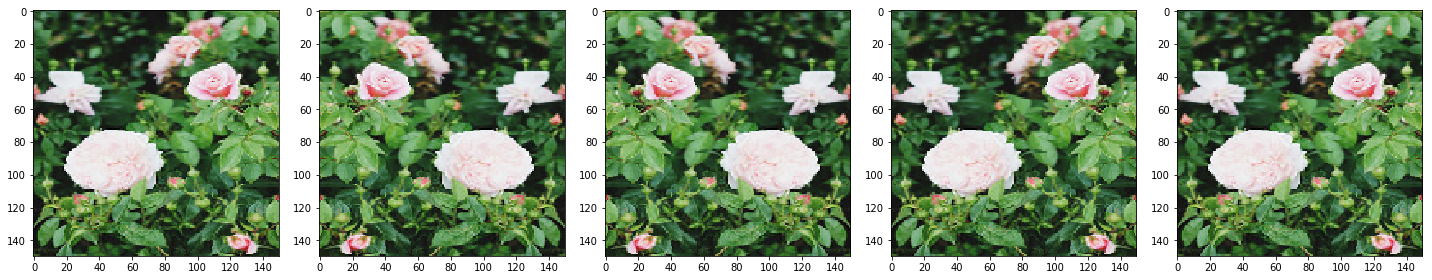

In [75]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

#### Randomly rotate the image
Let's take a look at a different augmentation called rotation and apply 45 degrees of rotation randomly to the training examples.

In [76]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [77]:
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1153 images belonging to 2 classes.


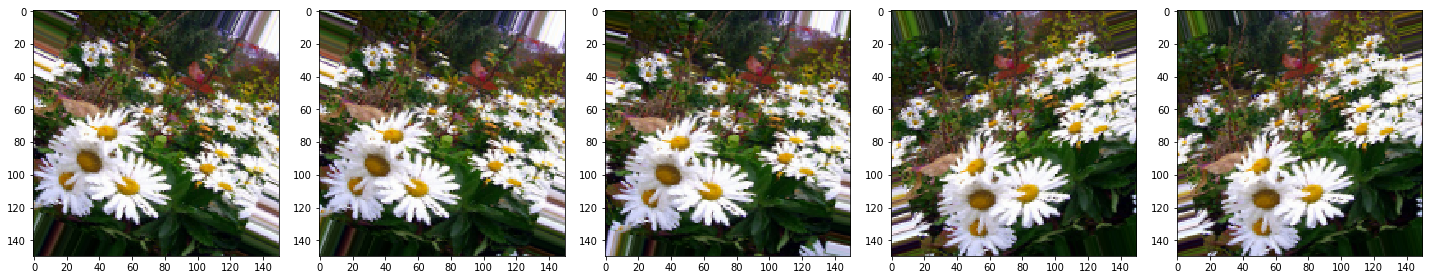

In [78]:
plotImages(augmented_images)


#### Apply zoom augmentation
Apply a zoom augmentation to the dataset to zoom images up to 50% randomly.

In [79]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)


In [80]:
train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1153 images belonging to 2 classes.


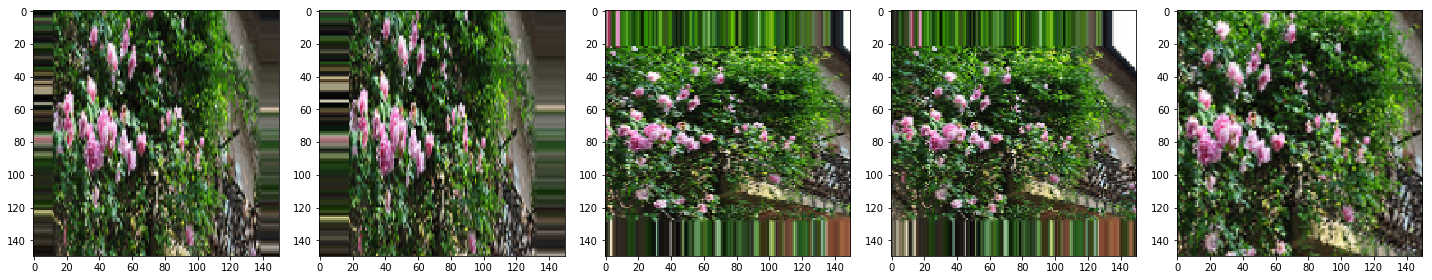

In [81]:
plotImages(augmented_images)


#### Put it all together
Apply all the previous augmentations. Here, you applied rescale, 45 degree rotation, width shift, height shift, horizontal flip and zoom augmentation to the training images.

In [82]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [83]:
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                )

Found 1153 images belonging to 2 classes.


Visualize how a single image would look five different times when passing these augmentations randomly to the dataset.



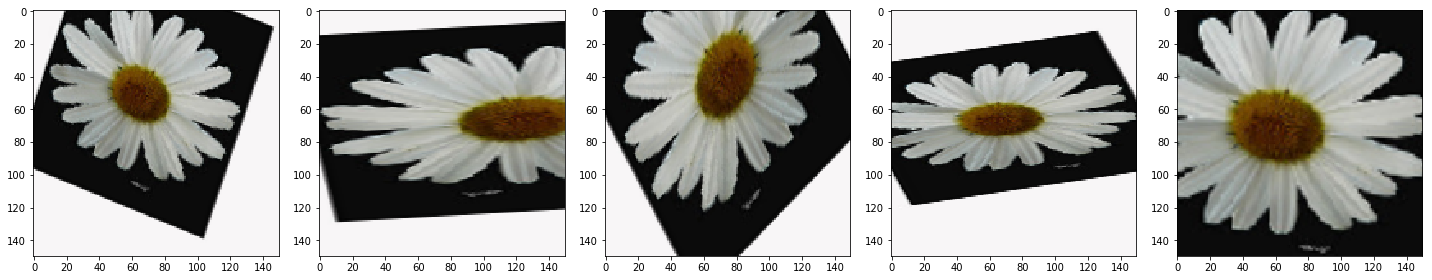

In [84]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Create validation data generator
Generally, only apply data augmentation to the training examples. In this case, only rescale the validation images and convert them into batches using ImageDataGenerator.

In [85]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [86]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 400 images belonging to 2 classes.


#### Dropout
Another technique to reduce overfitting is to introduce dropout to the network. It is a form of regularization that forces the weights in the network to take only small values, which makes the distribution of weight values more regular and the network can reduce overfitting on small training examples. Dropout is one of the regularization technique used in this tutorial

When you apply dropout to a layer it randomly drops out (set to zero) number of output units from the applied layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

When appling 0.1 dropout to a certain layer, it randomly kills 10% of the output units in each training epoch.

Create a network architecture with this new dropout feature and apply it to different convolutions and fully-connected layers.

#### Creating a new network with Dropouts
Here, you apply dropout to first and last max pool layers and to a fully connected layer that has 512 output units. 30% of the first and last max pool layer, and 10% of fully connected layer output units, are randomly set to zero during each training epoch.

In [87]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3,)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

Compile the model
After introducing dropouts to the network, compile the model and view the layers summary.

In [89]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

#### Train the model
After successfully introducing data augmentations to the training examples and adding dropouts to the network, train this new network:

In [90]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/80
12/12 [==============================] - 30s 2s/step - loss: 3.3780 - accuracy: 0.5056 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/80
12/12 [==============================] - 26s 2s/step - loss: 0.6928 - accuracy: 0.5195 - val_loss: 0.6920 - val_accuracy: 0.5750
Epoch 3/80
12/12 [==============================] - 29s 2s/step - loss: 0.6858 - accuracy: 0.5074 - val_loss: 0.6854 - val_accuracy: 0.5050
Epoch 4/80
12/12 [==============================] - 26s 2s/step - loss: 0.6714 - accuracy: 0.5707 - val_loss: 0.6898 - val_accuracy: 0.5250
Epoch 5/80
12/12 [==============================] - 30s 3s/step - loss: 0.6573 - accuracy: 0.6392 - val_loss: 0.6492 - val_accuracy: 0.7025
Epoch 6/80
12/12 [==============================] - 27s 2s/step - loss: 0.6358 - accuracy: 0.6626 - val_loss: 0.6251 - val_accuracy: 0.6850
Epoch 7/80
12/12 [==============================] - 27s 2s/step - loss: 0.6190 - accuracy: 0.6999 - val_loss: 0.6775 - val_accuracy: 0.6150
Epoch 8/80
12/12 [==

#### Visualize the model
Visualize the new model after training and see if there are signs of overfitting:

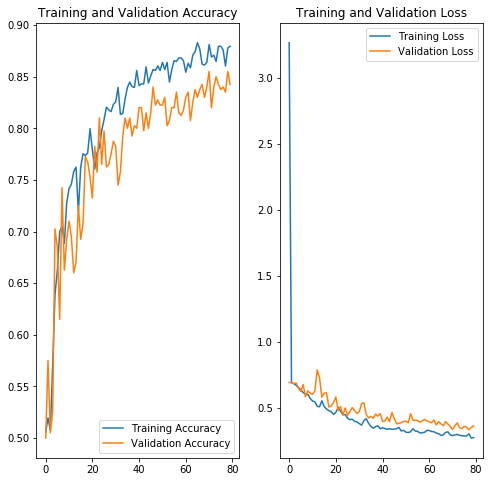

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Evaluating the model
As you can see, the model's learning curves are much better than before and there is much less overfitting. The model is able to achieve an accuracy of ~85%.